In [1]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [2]:
# Read the data in
employee = pd.read_csv(r"churn.csv")

In [3]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  7043
Columns  :  21


In [4]:
employee

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Value

In [6]:
#Replacing spaces with null values in total charges column
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [7]:
employee.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True) # one column at a time bb

In [9]:
employee.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Removing Irrelavent Variable 

In [10]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# #Employee Numeric columns
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [12]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)
# label in ascending order

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1


In [14]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

employee_combined.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2,53.85,108.15,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Data Partition-1

In [15]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Churn',axis=1)
y = employee_combined[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [16]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the Test data is 1409.


# Model 2 -GBM (Gradient boosting)

### Model 2 -GBM (Gradient boosting)

abc=pd.DataFrame(gscv_GBM.cv_results_)
abc=abc.loc[:,['param_learning_rate','mean_test_score']]
abc.head()

In [17]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [71, 40], # number of tress
        'max_depth': [4, 5],
                   'learning_rate':[0.8,0.6],
                    'min_samples_split':[50,70,80],
                   'min_samples_leaf':[100,200,270]}  # maximum branches in tree

In [18]:
#10,3  -- 5 times -- best = 78%
#10,5  -- 5 times -- best = 88%  --- selected
#50,3  -- 5 times -- best = 68%
#50,5  -- 5 times -- best = 86%

In [19]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [4, 5],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [71, 40]},
             scoring='accuracy', verbose=1)

In [20]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 4, 'min_samples_leaf': 200, 'min_samples_split': 50, 'n_estimators': 40}


In [21]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=4, min_samples_leaf=200,
                           min_samples_split=50, n_estimators=40)

In [22]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [23]:
train_pred

array([0, 0, 0, ..., 1, 1, 0])

# Confusion Matrix Train Data (2 Model)

In [24]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4113
           1       0.72      0.59      0.65      1521

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.77      5634
weighted avg       0.82      0.83      0.82      5634



# Confusion Matrix Test Data (2 Model) 

In [25]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.56      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



# Importance Feature

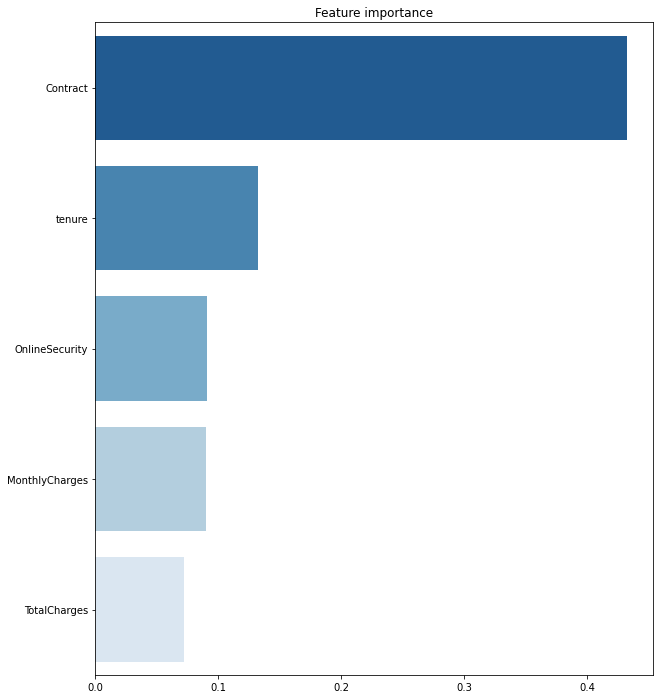

In [26]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

In [27]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[49, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
churn=['Yes','No']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


IndexError: index 49 is out of bounds for axis 0 with size 40

# Finished

# Business Submission

In [ ]:
import os 
os.chdir(r"Boosting Algorithm")

In [ ]:
import pickle
pickle.dump(final_mod_GBM, open('GBModel.pkl','wb')) # model = final_mod_GBM

In [ ]:
abc=pickle.load(open('GBModel.pkl','rb'))

In [ ]:
abc.predict(x_train)

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

In [ ]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[50, 100, 200, 500],  # number of trees
        'max_depth': [3, 5, 10]}              # maximum number of branches in each tree 
        #'min_samples_leaf': [10,5,15]            # minimum number of Sample in each child node or leaf 
                  

In [ ]:
################### data Analysis & Calculation  ############

import numpy as np   
import pandas as pd 
import datetime  

################### data Visualization  ############

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  

################### # Model Building ############
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1

################### # To avoid warning messages in the code run ############
import warnings   
warnings.filterwarnings("ignore")


In [ ]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

In [ ]:
# Prediction
train_pred = final_mod.predict(x_train) # model = Final_mod
test_pred = final_mod.predict(x_test)

In [ ]:
train=pd.concat([y_train,x_train],axis=1)
train['Predicted']=final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

In [ ]:
node_params = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
leaf_params = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [ ]:
xgb.to_graphviz(final_mod,num_trees=49,size="5,5",   # Tree = 50 
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

Yhat = Initial Prediction + Learning rate * Average error0 + Learning rate * Average error2 + ... + Learning rate * Average error49 
yhat = 0.5               + 0.3           * -0.568063915   +        0.3    * -0.455574751    +  

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

In [ ]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))